In [1]:
import pymatgen.analysis.solar.slme as slme
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Repeat over a range of thickness
thickness = np.logspace(-8, -3, 100, endpoint=True)
thickness_nm = thickness*1000000000

## load absorption data by absorption.dat

In [3]:
material1 = {
    "I_SOCHSE43": {
        "dir": 1.195,   # Direct bandgap value
        "indir": 1.195, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  } 

In [4]:
material2 = {
    "Br_SOCHSE43": {
        "dir": 1.806,   # Direct bandgap value
        "indir": 1.806, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  } 

In [5]:
material3 = {
    "I_hybrid": {
        "dir": 1.788,   # Direct bandgap value
        "indir": 1.788, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  } 

In [6]:
material4 = {
    "Br_hybrid": {
        "dir": 2.238,   # Direct bandgap value
        "indir": 2.238, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  } 

## input10

In [7]:
for material1, material_data1 in material1.items():
    data1 = np.loadtxt(material_data1["folder"] + '/I_SOCHSE43.dat', delimiter=' ')
    energy1 = data1[:,0]
    alpha_cm1 = data1[:,1]
    effSlm1 = []

In [8]:
for material2, material_data2 in material2.items():
    data2 = np.loadtxt(material_data2["folder"] + '/Br_SOCHSE43.dat', delimiter=' ')
    energy2 = data2[:,0]
    alpha_cm2 = data2[:,1]
    effSlm2 = []

In [9]:
for material3, material_data3 in material3.items():
    data3 = np.loadtxt(material_data3["folder"] + '/I_hybrid.dat', delimiter=' ')
    energy3 = data3[:,0]
    alpha_cm3 = data3[:,1]
    effSlm3 = []

In [10]:
for material4, material_data4 in material4.items():
    data4 = np.loadtxt(material_data4["folder"] + '/Br_hybrid.dat', delimiter=' ')
    energy4 = data4[:,0]
    alpha_cm4 = data4[:,1]
    effSlm4 = []

## iteration8

In [11]:
for i in thickness:
    eff1 = data1 = slme.slme(energy1,alpha_cm1,material_data1["dir"],material_data1["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm1.append(eff1)

In [12]:
for i in thickness:
    eff2 = data2 = slme.slme(energy2,alpha_cm2,material_data2["dir"],material_data2["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm2.append(eff2)

In [13]:
for i in thickness:
    eff3 = data3 = slme.slme(energy3,alpha_cm3,material_data3["dir"],material_data3["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm3.append(eff3)

In [14]:
for i in thickness:
    eff4 = data4 = slme.slme(energy4,alpha_cm4,material_data4["dir"],material_data4["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm4.append(eff4)

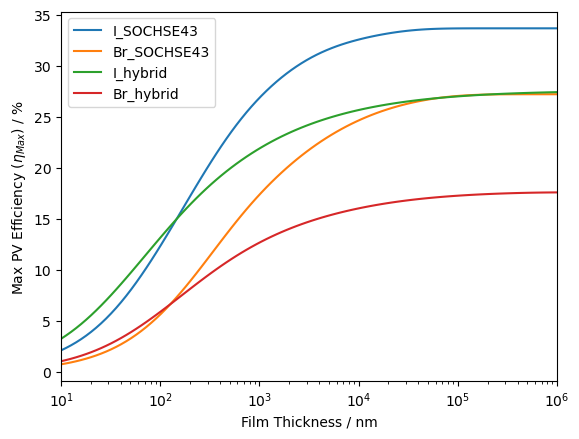

In [15]:
ax = plt.axes()

plt.plot(thickness_nm, effSlm1, label = 'I_SOCHSE43')

plt.plot(thickness_nm, effSlm2, label = 'Br_SOCHSE43')

plt.plot(thickness_nm, effSlm3, label = 'I_hybrid')

plt.plot(thickness_nm, effSlm4, label = 'Br_hybrid')

# Format your own plot
plt.xscale('log')
plt.margins(x=0)
plt.xlabel('Film Thickness / nm')
plt.ylabel('Max PV Efficiency $(\\eta_{Max})$ / % ')
plt.legend()

# plt.savefig('path_to_your_folder', format='pdf')